PyWaffle是一个开源的、使用MIT许可的Python包，用于绘制华夫饼图。 提供了一个名为"Figure"的构造类"Waffle"，可以传递给matplotlib.pyplot.figure，并生成一个matplotlib的"Figure"对象。

<br>

## 安装

In [1]:
!pip3 install pywaffle

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 2.3 MB/s eta 0:00:0000:0100:01


<br><br>

## 一、快速入门

这是一个简单的示例，用于绘制一个 **5行10列** 的华夫图（Waffle Chart）。这三个数值直接绘制为块，块的数量与值中的数字相匹配，因为值的总和等于总块数（行数乘以列数）。

参数values接受多种格式的数字，包括**列表、字典和pandas.DataFrame**。


### 1.1 列表数据




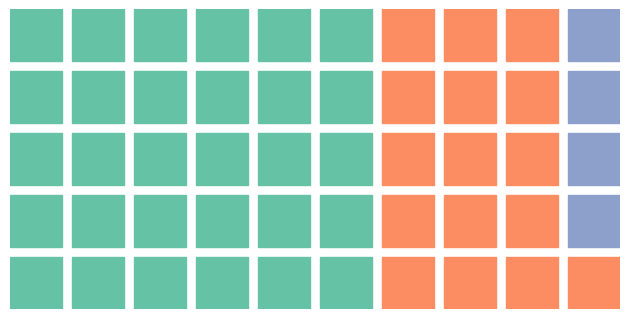

In [20]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns = 10,
    values = [30, 16, 4]
)

fig.savefig('plot1.png', dpi=300)

注意：在这种情况下，参数中的 rows 和 columns 其中一个是多余的，因为图表的大小和值的总和都为50。因此，rows 和 columns 中的一个可以省略，并且仍然可以通过值的总和自动计算出它。详见“自动调整大小”以获取更多详细信息。

<br>

### 1.2 字典数据

当将一个字典传递给 values 时，字典的键将被用作标签，并显示在图例中。

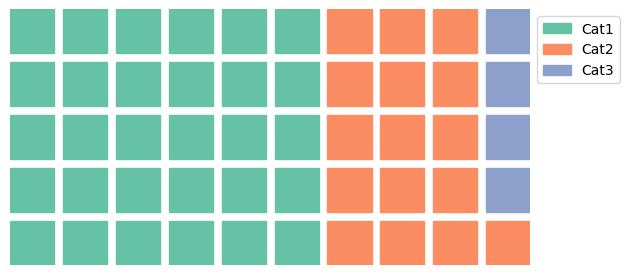

In [27]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns = 10,
    values = {'Cat1': 30, 
              'Cat2': 16, 
              'Cat3': 4},
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

fig.savefig('plot2.png', dpi=300)

<br>

### 1.3 DataFrame数据
与字典中的值可以自动生成标签和图例不同的是，当值是一个数据框（DataFrame）时，华夫图不会默认使用数据框的行索引作为标签。因此，如果您想要使用列索引作为标签，您必须手动将索引传递给参数 labels。

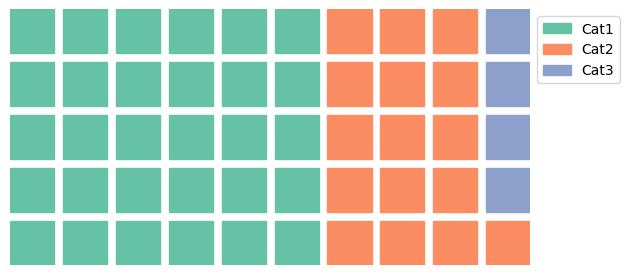

In [50]:
import pandas as pd

data = [30, 16, 4]
df = pd.DataFrame(data, 
                  columns=['Value'], 
                  index=['Cat1', 'Cat2', 'Cat3'])


fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=df['Value'],
    labels=list(df.index),  # 没有这行， Legend 不会显示
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

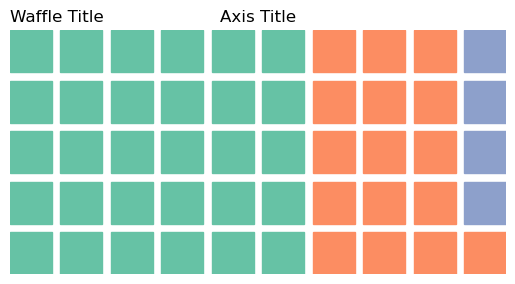

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 修改已存在的axis
ax.set_title("Axis Title")
# 确保绘制的图形在坐标轴两个方向上的比例保持一致
ax.set_aspect(aspect="equal")

Waffle.make_waffle(
    ax=ax,  # pass axis to make_waffle
    rows=5, 
    columns=10, 
    values=[30, 16, 4], 
    title={"label": "Waffle Title", "loc": "left"}
)

<br><br>

## 二、值缩放&尺寸调整
### 2.1 数值缩放
在实际情况中，图表的尺寸通常与数值的总和不相等。因此，必须对数值进行缩放，以适应图表的尺寸。

通过将参数 rounding_rule 设置为首选的舍入规则，可以实现这一目标。它接受三种值：**floor、ceil 或 nearest**。

注意：当 rounding_rule 设置为 ceil 或 nearest 时，缩放后的值的总和可能会大于图表的尺寸。如果是这样，最后一个类别的块将不会完全显示在图表中。因此，尽管 nearest 是默认的舍入规则，但实际上，floor 是最一致的规则，因为它可以避免块的溢出。

在下面的示例中，通过使用 rounding_rule=floor，将值缩放为 24、23、1 作为块的数量。

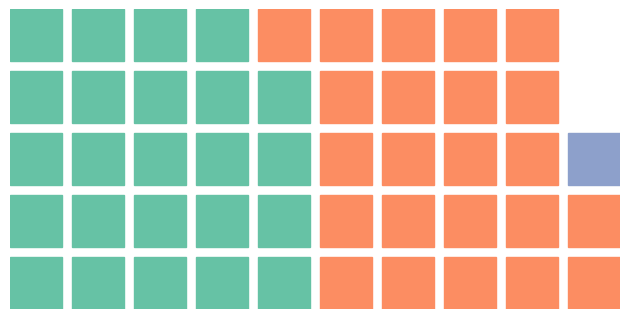

In [41]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=[48, 46, 3],
    rounding_rule='floor'
)

<br>

### 2.2 自动调整尺寸
如果您想避免值的缩放，只需将一个整数传递给 rows 或 columns 参数中的一个。然后，绝对数量的值将直接用作块的数量，并且另一个参数会自动计算。

在以下示例中，我们将 rows 设置为 5，values 设置为 [48, 46, 3]，并将 columns 留空。然后，块的数量将与值相同。由于值的总和为 97，列数必须为 20，以适应所有块。

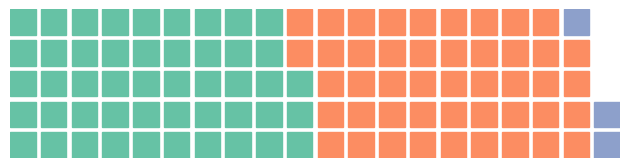

In [47]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[48, 46, 3]
)

<br><br>

## 三、标题、标签、图例
- 参数 `title` 以字典形式接受 `matplotlib.pyplot.title` 的参数。
- 参数 `labels` 以列表中的字符串标签形式接受。如果未指定，将使用 `values` 的键作为标签。
- 参数 `legend` 以字典形式接受 `matplotlib.pyplot.legend` 的参数。

注意：标签也可以在参数 `legend` 下的 `labels` 键中指定。

这些信息描述了使用 `pywaffle` 库中某些参数的功能。这些参数用于在绘图中设置标题、标签和图例的属性。

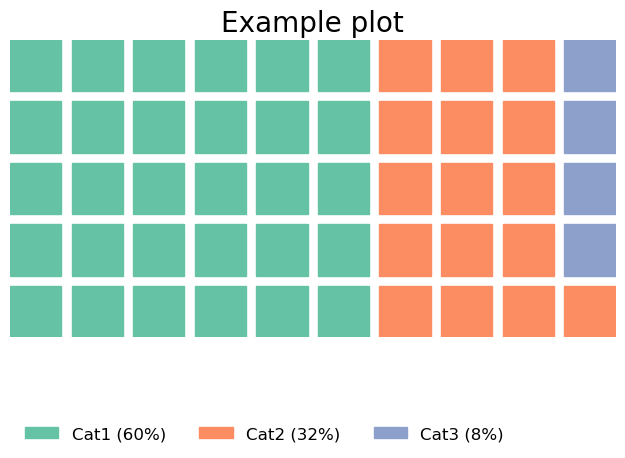

In [53]:
data = {'Cat1': 30, 'Cat2': 16, 'Cat3': 4}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=data,
    title={
        'label': 'Example plot',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 12
    }
)

<br><br>

### 四、块配色
参数colors接受一个颜色列表或元组。其长度必须与values相同，可接受的颜色格式包括不区分大小写的十六进制RGB或RGBA，RGB或RGBA元组，单字符表示法，不区分大小写的X11/CSS4颜色名称等，只要Matplotlib能够识别即可。请参阅Matplotlib颜色文档获取完整列表。






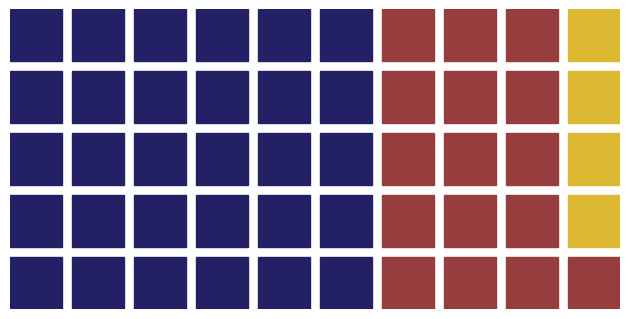

In [54]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=[30, 16, 4],
    colors=["#232066", "#983D3D", "#DCB732"]
)



<br> 改变块颜色的另一种方法是通过将颜色映射（Colormap）传递给参数 cmap_name，从而批量设置颜色。

**注意**：顺序型颜色映射在 PyWaffle 中不起作用。只支持质性颜色映射，包括 Pastel1、Pastel2、Paired、Accent、Dark2、Set1、Set2、Set3、tab10、tab20、tab20b、tab20c。请参阅Matplotlib中的颜色映射列表和示例以获取更多信息。

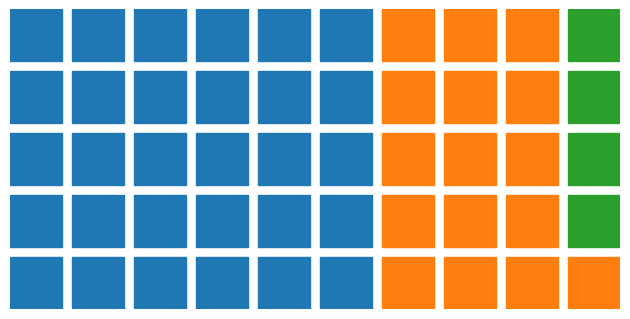

In [55]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=[30, 16, 4],
    cmap_name="tab10"
)


<br><br>

## 五、块形状
默认块的形状为正方形， 但是也可以用**characters**、**icons**确定为其他形状。
### 5.1 characters

可以通过将所需的字符传递给 **characters** 参数，而不是矩形块，来使用 Unicode 字符来表示块。

可以通过将包含每个类别对应字符的列表或元组传递给 characters 参数，为每个类别指定不同的字符。字符列表的长度必须与 values 参数的长度相同。

要指定字体，请将绝对路径传递给 .ttf 或 .otf 字体文件到 **font_file** 参数。

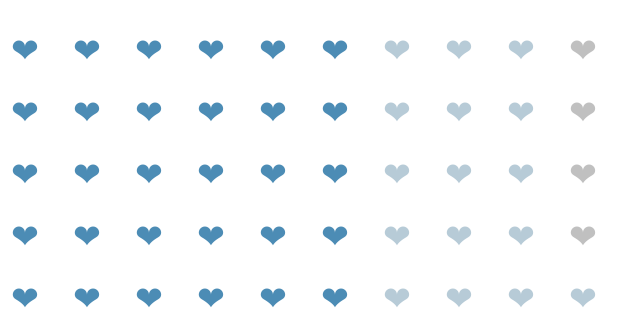

In [62]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#4C8CB5", "#B7CBD7", "#C0C0C0"],
    characters='❤',
    font_size=24
)

<br>

### 5.2 图标
使用图标的华夫图也被称为象形图表（Pictogram Chart）。

PyWaffle 支持通过 Font Awesome 绘制带有图标的图表。有关 Font Awesome 如何集成到 PyWaffle 中的信息，请查看“Font Awesome 集成”页面。要在 Font Awesome 中搜索可用的图标名称，请访问 https://fontawesome.com/search。

在使用图标时，设置块大小的参数将被忽略，包括 interval_ratio_x、interval_ratio_y 和 block_aspect_ratio。相反，使用 font_size 来设置图标的大小。有关允许的大小，请参见 FontProperties.set_size。

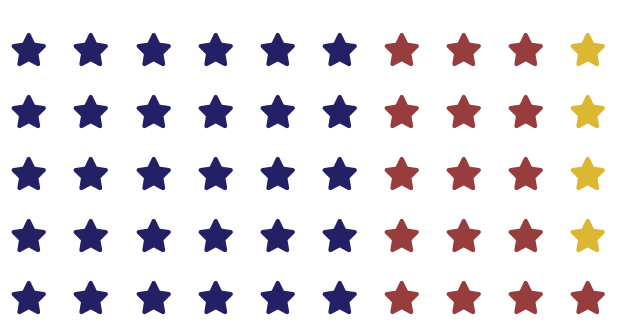

In [63]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#232066", "#983D3D", "#DCB732"],
    icons='star',
    font_size=24 #icon大小
)

每个类别可以有不同的图标，通过将图标名称的列表或元组传递给参数 icons 来实现。其长度必须与 values 的长度相同。

在 Font Awesome 图标库中，有不同风格的图标集，包括 Solid、Regular 和 Brands。可以通过参数 icon_style 来指定图标的风格。默认情况下，它会从 Solid 风格中搜索图标。

通过设置 icon_legend=True，图例中的符号将会是图标。否则，它将是一个颜色条。






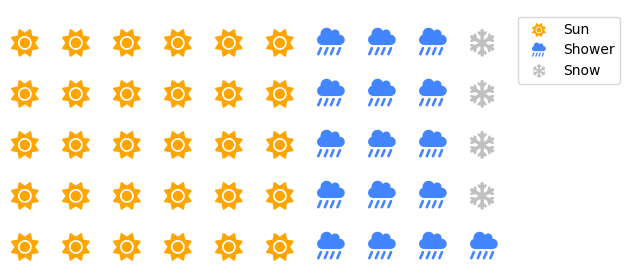

In [70]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#FFA500", "#4384FF", "#C0C0C0"],
    icons=['sun', 'cloud-showers-heavy', 'snowflake'],
    font_size=20,
    icon_style='solid',
    #设置 icon_legend=True，图例中的符号将会是图标。否则，它将是一个颜色条。
    icon_legend=True,
    legend={
        'labels': ['Sun', 'Shower', 'Snow'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)


Font Awesome根据图标名称和样式来定位图标。因此，不同图标的样式可能不同，您必须为所有图标单独指定图标样式。因此，icon_style 参数还可以接受一个包含样式字符串的列表或元组，以用于不同的图标。

在Font Awesome中，您需要根据图标的名称和样式来选择正确的图标。这些图标的样式可能包括不同的风格，因此您需要单独指定每个图标的样式。通过使用icon_style 参数，您可以为每个图标选择适当的样式，以确保它们在呈现时显示正确的外观。这在使用Font Awesome图标时很重要，因为它允许您根据需要选择不同的样式。

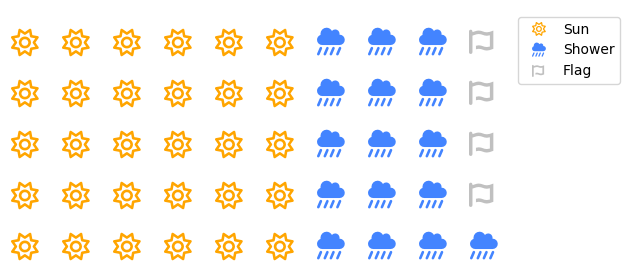

In [72]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#FFA500", "#4384FF", "#C0C0C0"],
    icons=['sun', 'cloud-showers-heavy', 'font-awesome'],
    icon_size=20,
    icon_style=['regular', 'solid', 'brands'],
    icon_legend=True,
    legend={
        'labels': ['Sun', 'Shower', 'Flag'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)